<a href="https://colab.research.google.com/github/tncisrael/Smoobu_Analytics_Project/blob/main/Smoobu_Guest_Messaging_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd

headers = {'Api-Key': 'zNA2z0ApDJMudqaA8STXsEilIrlXPILPkEowwrU4Gw'}

# Fetch all reservations
reservations_response = requests.get('https://login.smoobu.com/api/reservations', headers=headers)

if reservations_response.status_code == 200:
    reservations = reservations_response.json()['bookings']
    all_messages = []

    # Fetch messages for each reservation
    for reservation in reservations:
        reservation_id = reservation['id']
        messages_response = requests.get(f'https://login.smoobu.com/api/reservations/{reservation_id}/messages', headers=headers)

        if messages_response.status_code == 200:
            all_messages.extend(messages_response.json()['messages'])

    df = pd.DataFrame(all_messages)
else:
    print(f"Error: {reservations_response.status_code}")


In [3]:
df.head()


,id,subject,message,htmlMessage,type,createdAt
0,168448721,,"Hi Shai,thank you for accepting out booking. I...","Hi Shai,thank you for accepting out booking. I...",1,2023-07-11 22:42:42
1,168449456,,"Hi Shai, sounds great. Thank you :) Worst case...","Hi Shai, sounds great. Thank you :) Worst case...",1,2023-07-11 22:46:35
2,168449483,,Looking forward to our stay,Looking forward to our stay,1,2023-07-11 22:46:44
3,168449660,,"our flight is landing at 23.55 at Ben Gurion, ...","our flight is landing at 23.55 at Ben Gurion, ...",1,2023-07-11 22:47:55
4,168449978,,Toda raba :),Toda raba :),1,2023-07-11 22:49:15


In [4]:
common_queries = df['message'].value_counts().head(10)
print("Common Queries:")
print(common_queries)


Common Queries:
Marked as no reply needed                                                                                                                                                                                                                                                                                                                                                                                                                                                            14
אחר\nמידע נוסף: Dear Adi Gafni, we're happy to confirm this.                                                                                                                                                                                                                                                                                                                                                                                                                          2
Yes                                     

In [5]:
message_types = df['type'].value_counts()
print("Message Types:")
print(message_types)


Message Types:
1    77
2    40
Name: type, dtype: int64


In [10]:
# Convert 'createdAt' to datetime format
df['createdAt'] = pd.to_datetime(df['createdAt'])

# Extract the hour from the datetime
df['hour'] = df['createdAt'].dt.hour

# Count the frequency of messages per hour
active_hours = df['hour'].value_counts().sort_index()

print("Most Active Hours:")
print(active_hours)


Most Active Hours:
0      4
2      4
7      5
8      1
9      4
10     1
11     7
12    17
13     2
14     5
15     2
16     1
17     8
18    16
19    10
20     7
21     2
22    19
23     2
Name: hour, dtype: int64


In [9]:
print(df.columns)


Index(['id', 'subject', 'message', 'htmlMessage', 'type', 'createdAt'], dtype='object')


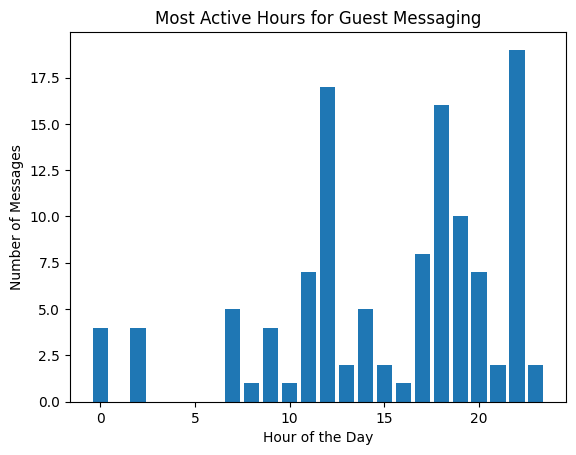

In [11]:
import matplotlib.pyplot as plt

plt.bar(active_hours.index, active_hours.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('Most Active Hours for Guest Messaging')
plt.show()


In [12]:
# Save DataFrame to CSV
df.to_csv('Smoobu_Guest_Messaging_Analysis.csv', index=False)
